<font size="+5">#09. Cluster Analysis con k-Means</font>

- Book + Private Lessons [Here ↗](https://sotastica.com/reservar)
- Subscribe to my [Blog ↗](https://blog.pythonassembly.com/)
- Let's keep in touch on [LinkedIn ↗](www.linkedin.com/in/jsulopz) 😄

# Load the Data

> - Simply execute the following lines of code to load the data
> - This dataset contains **statistics** (columns)
> - About **Car Models** (rows)

In [59]:
import seaborn as sns

df = sns.load_dataset(name='mpg', index_col='name')
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
datsun 810 maxima,24.2,6,146.0,120.0,2930,13.8,81,japan
subaru dl,33.8,4,97.0,67.0,2145,18.0,80,japan
chevrolet monte carlo landau,15.5,8,350.0,170.0,4165,11.4,77,usa
pontiac catalina,16.0,8,400.0,170.0,4668,11.5,75,usa
volkswagen rabbit custom,29.0,4,97.0,78.0,1940,14.5,77,europe
ford granada l,22.0,6,232.0,112.0,2835,14.7,82,usa
dodge colt hardtop,25.0,4,97.5,80.0,2126,17.0,72,usa
toyota corolla 1200,31.0,4,71.0,65.0,1773,19.0,71,japan
dodge coronet custom,15.0,8,318.0,150.0,3777,12.5,73,usa


In [60]:
dfclean=df.dropna()
dfclean

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,usa
vw pickup,44.0,4,97.0,52.0,2130,24.6,82,europe
dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,usa


In [61]:
X=dfclean[['mpg','horsepower']]

# Data `preprocessing`

> - Do you need to *transform* the data
> - To get a **truthful insight** of the model?

In [62]:
from sklearn.preprocessing import MinMaxScaler

In [63]:
scaler=MinMaxScaler()

In [64]:
import pandas as pd

In [65]:
dfnorm = pd.DataFrame(scaler.fit_transform(X=dfclean[['mpg','horsepower']]),columns=['mpg', 'horsepower'])


# `KMeans()` Model in Python

## Build the Model

> 1. **Necesity**: Build Model
> 2. **Google**: How do you search for the solution?
> 3. **Solution**: Find the `function()` that makes it happen

In [66]:
from sklearn.cluster import KMeans

In [67]:
model=KMeans(n_clusters=7)

## Code Thinking

> Which function computes the Model?
> - `fit()`
>
> How could can you **import the function in Python**?

In [68]:
model.fit(X)

KMeans(n_clusters=7)

### Separate Variables for the Model

> Regarding their role:
> 1. **Target Variable `y`**
>
> - [ ] What would you like **to predict**?
>
> Total number of accients? Or Alcohol?
>
> 2. **Explanatory Variable `X`**
>
> - [ ] Which variable will you use **to explain** the target?

### Data Visualization to Analyize Patterns

> - Visualize the 2 variables with a `scatterplot()`
> - And decide *how many `clusters`* you'd like to calculate

<AxesSubplot:xlabel='mpg', ylabel='horsepower'>

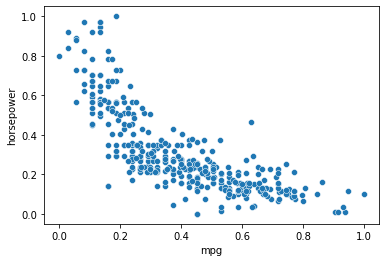

In [69]:
sns.scatterplot(x='mpg', y='horsepower', data=dfnorm)

### Finally `fit()` the Model

## `predict()` the *cluster* for every row

> - `model.` + `↹`

In [70]:
pred=model.predict(X=dfnorm)

> - Create a `dfsel` DataFrame
> - That contains the **columns you used for the model**

In [71]:
dfsel=dfnorm.copy()

> - Add a **new column**
> - That **contains the `cluster` prediction** for every USA State

In [72]:
dfsel['cluster'] = pred

In [73]:
dfsel.sample(20)

,mpg,horsepower,cluster
196,0.638298,0.038043,4
37,0.132979,0.646739,4
373,0.718085,0.130435,4
158,0.212766,0.347826,4
207,0.265957,0.228261,4
79,0.345745,0.217391,4
295,0.436170,0.168478,4
297,0.484043,0.135870,4
266,0.484043,0.277174,4
13,0.132979,0.972826,4


## Model Visualization

> - You may `hue=` the points with the `cluster` column

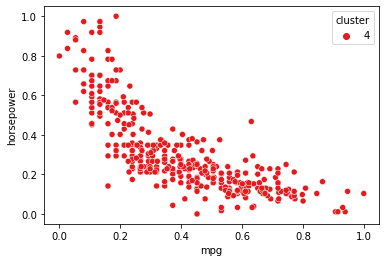

In [74]:
sns.scatterplot(x='mpg', y='horsepower', data=dfsel,hue=dfsel.cluster, palette='Set1');

## Model Interpretation

In [2]:
%%HTML

<iframe width="560" height="315" src="https://www.youtube.com/embed/4b5d3muPQmA" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

> - Can you put a **`nickname` to each group**?
> - Observe the `centroids` within `model.` + `↹`

In [77]:
model.__dict__

{'n_clusters': 7,
 'init': 'k-means++',
 'max_iter': 300,
 'tol': 0.0001,
 'precompute_distances': 'deprecated',
 'n_init': 10,
 'verbose': 0,
 'random_state': None,
 'copy_x': True,
 'n_jobs': 'deprecated',
 'algorithm': 'auto',
 'n_features_in_': 2,
 '_n_threads': 8,
 '_n_init': 10,
 '_tol': 0.07692763088296567,
 '_algorithm': 'elkan',
 'cluster_centers_': array([[ 28.67605634,  77.30985915],
        [ 13.8       , 175.625     ],
        [ 20.59423077, 111.09615385],
        [ 15.5       , 144.93442623],
        [ 34.09545455,  62.62121212],
        [ 12.76923077, 214.15384615],
        [ 22.77047619,  92.5047619 ]]),
 'labels_': array([3, 1, 3, 3, 3, 5, 5, 5, 5, 1, 1, 3, 3, 5, 6, 6, 6, 6, 6, 4, 6, 6,
        6, 2, 6, 5, 5, 5, 1, 6, 6, 6, 6, 2, 6, 6, 6, 1, 1, 3, 3, 1, 1, 1,
        2, 0, 6, 6, 6, 6, 0, 0, 4, 4, 4, 0, 6, 0, 4, 6, 6, 1, 1, 3, 3, 3,
        5, 3, 3, 1, 6, 3, 3, 3, 3, 2, 0, 6, 0, 6, 6, 6, 0, 6, 1, 3, 3, 3,
        3, 5, 3, 3, 3, 5, 5, 1, 2, 6, 6, 6, 6, 4, 3, 1, 1, 1, 6, 

In [76]:
dfcentroides = pd.DataFrame(model.cluster_centers_, columns=['mpg', 'horsepower'])
dfcentroides


,mpg,horsepower
0,28.676056,77.309859
1,13.800000,175.625000
2,20.594231,111.096154
3,15.500000,144.934426
4,34.095455,62.621212
5,12.769231,214.153846
6,22.770476,92.504762


## Model Visualization with Centroids

> - I want to see the `centroid`
> - with a **big `markers="X"`** in the plot

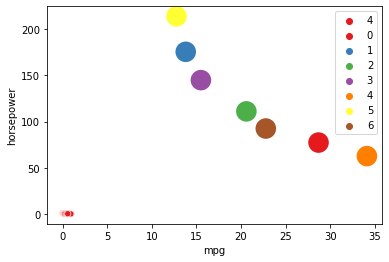

In [78]:
sns.scatterplot(x='mpg', y='horsepower', data=dfsel,hue=dfsel.cluster, palette='Set1');
sns.scatterplot(x='mpg', y='horsepower', data=dfcentroides,hue=dfcentroides.index, palette='Set1', s=500);

# Achieved Goals

_Double click on **this cell** and place an `X` inside the square brackets (i.e., [X]) if you think you understand the goal:_

- [ ] Understand how the **machine optimizes a model**
    - No more than to find the best numbers for a mathematical equation
- [ ] **Residual Sum of Squares (RSS)** as a fundamental measure for the **error**. We see it on ↓
    - Neural Networks
    - Linear Regression
    - Variance
- [ ] Understand the necessity to **Scale** the Data
    - For all algorithms that involves **distance calculation**.
- [ ] Understand that programming is not an end itself, but a tool to achieve the end
    - We need to understand the problem and design the solution before coding
    - But we won't need how to design the solution if we don't know how to code first
    - Solution? Apply the discipline
- [ ] There is **not a unique way to group data**. The same way it is not a unique way ↓
    - To predict a number **Regression Mathematical Equations**
    - To predict a category **Classification Mathematical Equations**